# <span style="color:#00796B;">📑 **Stock Price Prediction from Historical Records**</span>

---

### 🧠 **Project Title:** Stock Price Prediction Using Recurrent Neural Network (RNN)  
### 🖋️ **Authors:** Naseem I. Kesingwala and Naguri Srividya
### 📅 **Date:** Apr-2025

---

# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
# Import libraries

# Core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Date-related operations
from datetime import datetime

# For scaling numerical values before feeding into models
from sklearn.preprocessing import MinMaxScaler

# For setting random seeds to ensure consistent results
import random

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings("ignore")

# Set seaborn plot style
sns.set(style='whitegrid')

# TensorFlow and Keras libraries for building RNN-based models
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, BatchNormalization, Input, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
from keras.metrics import MeanSquaredError, RootMeanSquaredError, MeanAbsoluteError
from keras.callbacks import EarlyStopping

# Scikit-learn utilities for evaluation and splitting data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# For generating combinations (e.g., for grid search)
from itertools import product

# Set random seeds for reproducibility across runs
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [2]:
# Define a function to load data and aggregate them

# Function to load and combine stock data from multiple CSV files
def load_and_combine_stock_data(file_list):
    """
    Takes a list of CSV file names, loads each file, adds a 'Stock' column,
    selects relevant columns, and returns a single concatenated DataFrame.
    """
    combined_data = []

    for file in file_list:
        # Get stock symbol from the file name (e.g., 'AMZN' from 'AMZN_stocks_data.csv')
        stock_name = file.split('_')[0]
        
        # Load the CSV file
        df = pd.read_csv(file)
        
        # Add a column to mark the stock symbol
        df['Stock'] = stock_name
        
        # Keep only necessary columns
        df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stock']]
        
        # Add to the list of dataframes
        combined_data.append(df)

    # Merge all dataframes into one
    final_df = pd.concat(combined_data, ignore_index=True)
    
    return final_df

In [3]:
# Specify the names of the raw data files to be read and load each dataset individually

# Load stock data for Amazon, Google, IBM, and Microsoft

# List of stock data CSV files
file_names = [
    "AMZN_stocks_data.csv",
    "GOOGL_stocks_data.csv",
    "IBM_stocks_data.csv",
    "MSFT_stocks_data.csv"
]

# Load individual datasets from respective files

# Amazon stock data
df_amzn = pd.read_csv(file_names[0])

# Google stock data
df_googl = pd.read_csv(file_names[1])

# IBM stock data
df_ibm = pd.read_csv(file_names[2])

# Microsoft stock data
df_msft = pd.read_csv(file_names[3])

In [4]:
# View specifics of the data

# Function to display basic info, statistics, and data quality checks for a given stock DataFrame
def display_data_info(df, name):
    print(f"{name} Stock Data:")
    display(df.head())
    print("\nSummary Statistics:")
    display(df.describe())
    print("\nData Types:")
    display(df.dtypes)
    print("\nMissing Values:")
    display(df.isnull().sum())
    print("\n")

# View data details for each stock
print("============================ Amazon Data ============================\n")
display_data_info(df_amzn, "Amazon")

print("============================ Google Data ============================\n")
display_data_info(df_googl, "Google")

print("============================= IBM Data ==============================\n")
display_data_info(df_ibm, "IBM")

print("=========================== Microsoft Data ===========================\n")
display_data_info(df_msft, "Microsoft")

============================ Amazon Data ============================

Amazon Stock Data:


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN



Summary Statistics:


,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,299.335310,302.371163,296.037695,299.376231,5.931712e+06
std,280.120547,281.826442,277.927134,279.980161,5.122034e+06
min,26.090000,26.300000,25.760000,26.070000,9.864350e+05
25%,81.175000,82.580000,79.725000,81.090000,3.137037e+06
50%,205.330000,208.000000,202.100000,205.440000,4.724100e+06
75%,375.570000,379.155000,373.000000,375.140000,7.135246e+06
max,1204.880000,1213.410000,1191.150000,1195.830000,1.044046e+08



Data Types:


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


Missing Values:


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64



============================ Google Data ============================

Google Stock Data:


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL



Summary Statistics:


,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07



Data Types:


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


Missing Values:


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64



============================= IBM Data ==============================

IBM Stock Data:


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM



Summary Statistics:


,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07



Data Types:


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


Missing Values:


Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64



=========================== Microsoft Data ===========================

Microsoft Stock Data:


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT



Summary Statistics:


,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,36.496817,36.827903,36.173190,36.513412,5.161762e+07
std,14.683337,14.742483,14.620057,14.694656,3.114958e+07
min,15.200000,15.620000,14.870000,15.150000,7.425603e+06
25%,26.785000,27.045000,26.535000,26.835000,3.136557e+07
50%,29.990000,30.230000,29.780000,30.000000,4.617529e+07
75%,44.545000,44.980000,44.090000,44.400000,6.322291e+07
max,87.120000,87.500000,86.230000,86.850000,5.910786e+08



Data Types:


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


Missing Values:


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [5]:
# Define the columns for which missing values need to be handled
columns_to_fill = ['Open', 'High', 'Low', 'Close', 'Volume']

# Fill missing values in key numerical columns using forward fill (ignores 'Date' and stock name)
# This assumes missing values are due to data gaps and previous value is a good estimate

# Amazon
df_amzn[columns_to_fill] = df_amzn[columns_to_fill].ffill()

# Google
df_googl[columns_to_fill] = df_googl[columns_to_fill].ffill()

# IBM
df_ibm[columns_to_fill] = df_ibm[columns_to_fill].ffill()

# Microsoft
df_msft[columns_to_fill] = df_msft[columns_to_fill].ffill()

# Confirm that all missing values in the selected columns have been filled
print("Amazon Missing Values After Handling:")
print(df_amzn[columns_to_fill].isnull().sum())

print("\nGoogle Missing Values After Handling:")
print(df_googl[columns_to_fill].isnull().sum())

print("\nIBM Missing Values After Handling:")
print(df_ibm[columns_to_fill].isnull().sum())

print("\nMicrosoft Missing Values After Handling:")
print(df_msft[columns_to_fill].isnull().sum())

Amazon Missing Values After Handling:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Google Missing Values After Handling:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

IBM Missing Values After Handling:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Microsoft Missing Values After Handling:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

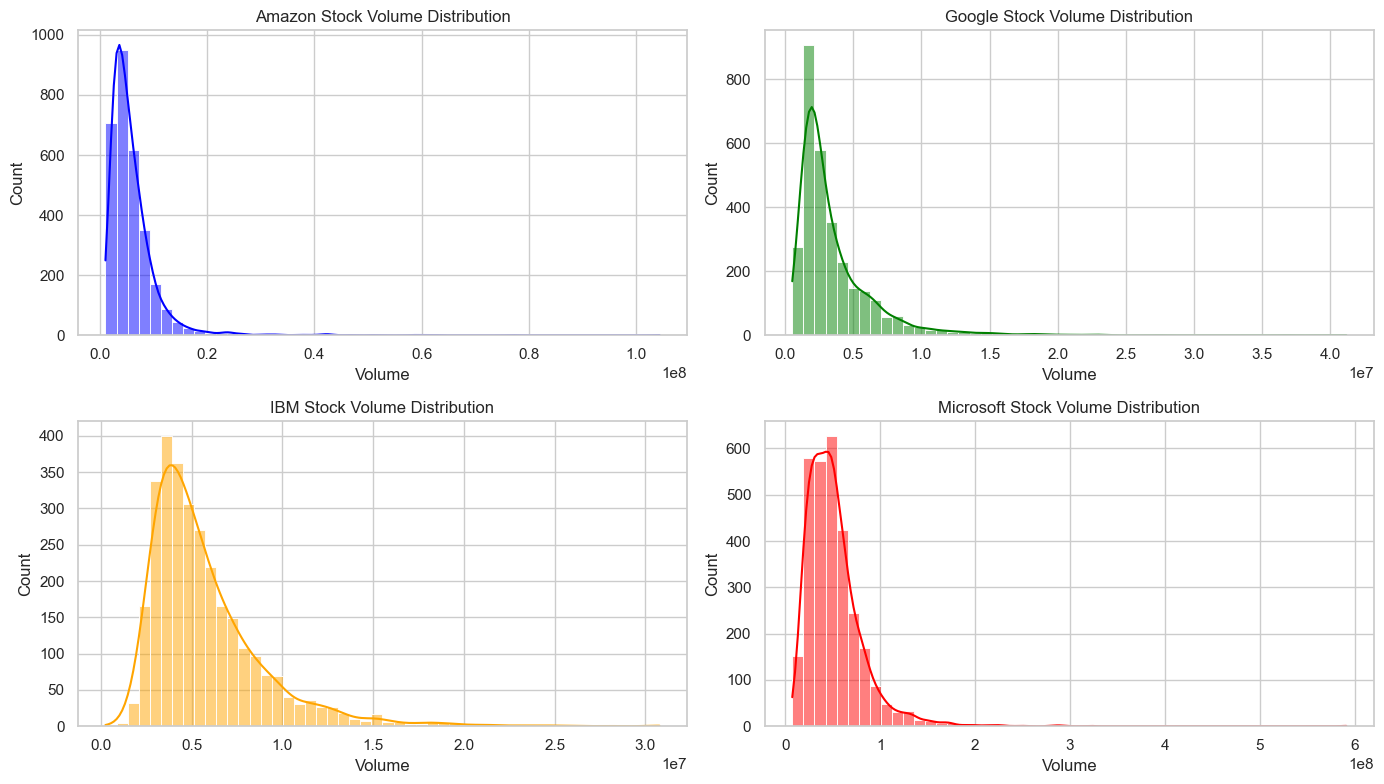

In [6]:
# Frequency distribution of volumes

# Initialize plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Amazon stock volume
plt.subplot(2, 2, 1)
sns.histplot(df_amzn['Volume'], bins=50, color='blue', kde=True)
plt.title('Amazon Stock Volume Distribution')

# Google stock volume
plt.subplot(2, 2, 2)
sns.histplot(df_googl['Volume'], bins=50, color='green', kde=True)
plt.title('Google Stock Volume Distribution')

# IBM stock volume
plt.subplot(2, 2, 3)
sns.histplot(df_ibm['Volume'], bins=50, color='orange', kde=True)
plt.title('IBM Stock Volume Distribution')

# Microsoft stock volume
plt.subplot(2, 2, 4)
sns.histplot(df_msft['Volume'], bins=50, color='red', kde=True)
plt.title('Microsoft Stock Volume Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

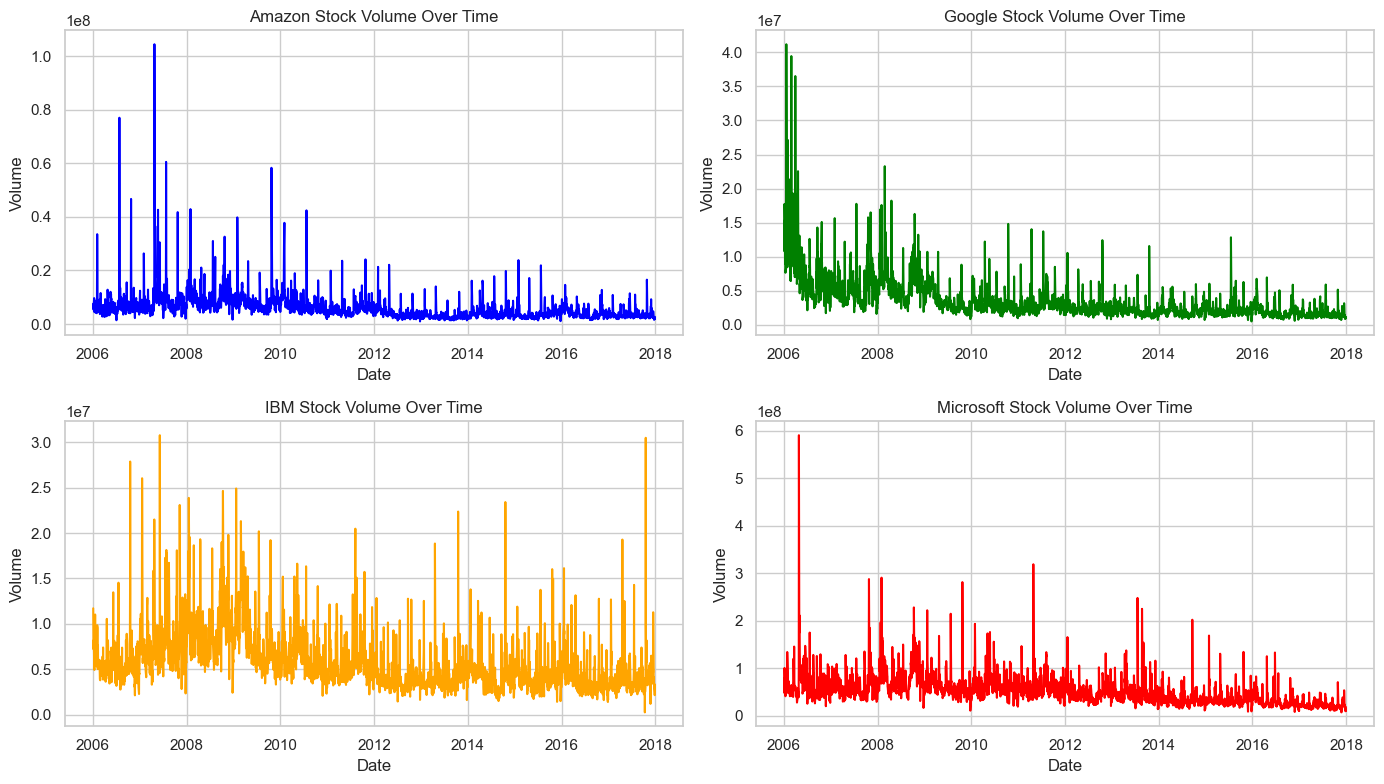

In [7]:
# Stock volume variation over time

# Define figure size for the 4-panel plot
plt.figure(figsize=(14, 8))

# Ensure 'Date' is in datetime format for plotting
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_googl['Date'] = pd.to_datetime(df_googl['Date'])
df_ibm['Date'] = pd.to_datetime(df_ibm['Date'])
df_msft['Date'] = pd.to_datetime(df_msft['Date'])

# Plot volume trends for Amazon
plt.subplot(2, 2, 1)
plt.plot(df_amzn['Date'], df_amzn['Volume'], color='blue')
plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Plot volume trends for Google
plt.subplot(2, 2, 2)
plt.plot(df_googl['Date'], df_googl['Volume'], color='green')
plt.title('Google Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Plot volume trends for IBM
plt.subplot(2, 2, 3)
plt.plot(df_ibm['Date'], df_ibm['Volume'], color='orange')
plt.title('IBM Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Plot volume trends for Microsoft
plt.subplot(2, 2, 4)
plt.plot(df_msft['Date'], df_msft['Volume'], color='red')
plt.title('Microsoft Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Arrange layout for better spacing
plt.tight_layout()
plt.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

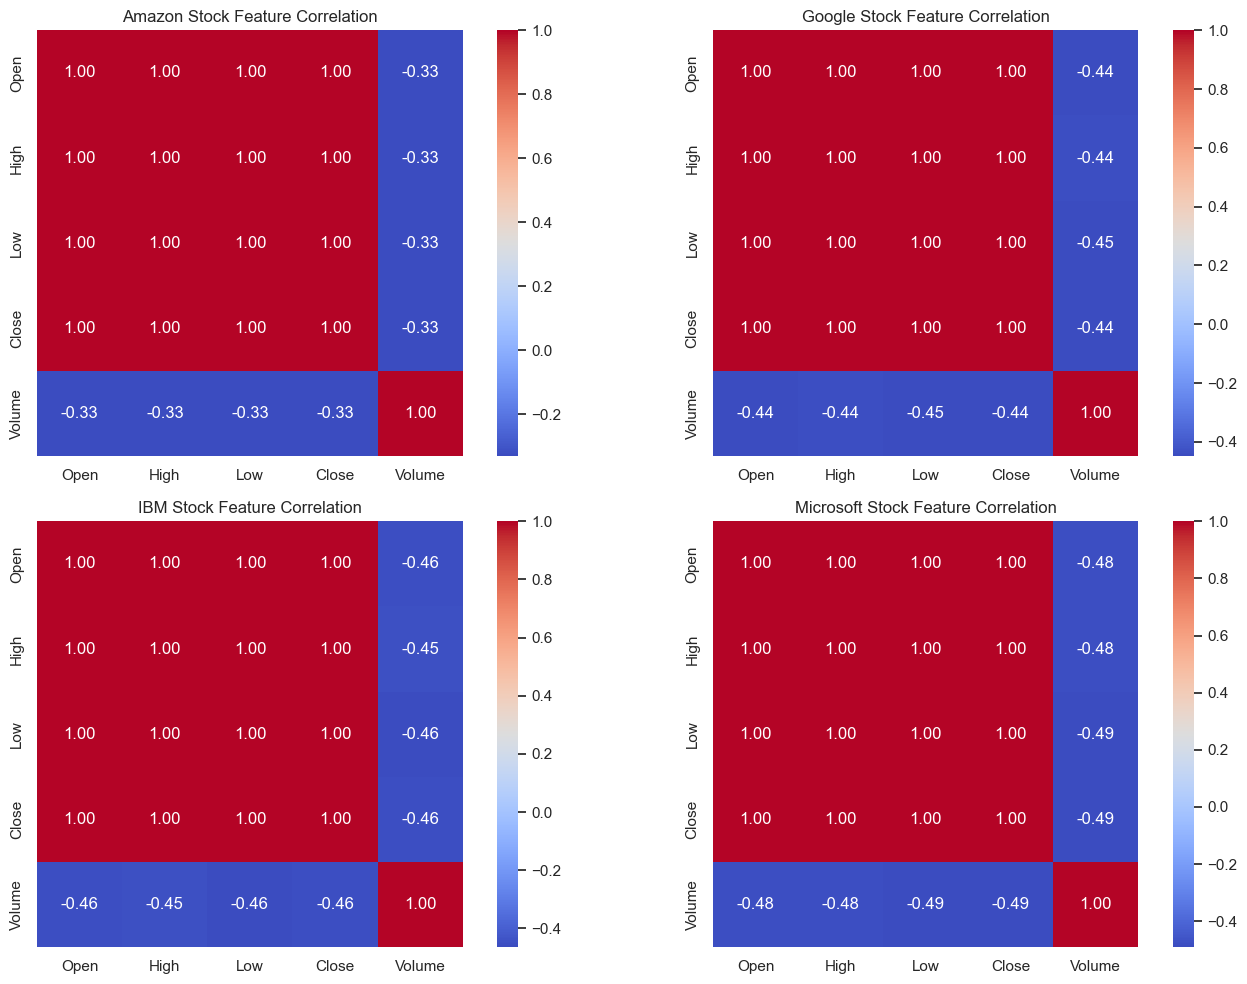

In [8]:
# Analyse correlations

# Compute correlation matrices for each company
corr_amzn = df_amzn[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
corr_googl = df_googl[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
corr_ibm = df_ibm[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
corr_msft = df_msft[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Define figure size for all heatmaps
plt.figure(figsize=(14, 10))

# Amazon
plt.subplot(2, 2, 1)
sns.heatmap(corr_amzn, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Amazon Stock Feature Correlation')

# Google
plt.subplot(2, 2, 2)
sns.heatmap(corr_googl, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Google Stock Feature Correlation')

# IBM
plt.subplot(2, 2, 3)
sns.heatmap(corr_ibm, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('IBM Stock Feature Correlation')

# Microsoft
plt.subplot(2, 2, 4)
sns.heatmap(corr_msft, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Microsoft Stock Feature Correlation')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [9]:
# Define a function that divides the data into windows and generates target variable values for each window

def create_windowed_data(df, window_size, step_size, target_columns):
    """
    Creates windowed data from the main DataFrame.
    
    Parameters:
    df (pd.DataFrame): The main DataFrame containing the stock data.
    window_size (int): The size of the window used for generating X values.
    step_size (int): The stride length for moving the window.
    target_columns (list): List of target column names whose values need to be predicted.
    
    Returns:
    X_data (list): List of arrays representing features for each window.
    y_data (list): List of arrays representing target values for each window.
    """
    X_data = []  # To hold feature data for each window
    y_data = []  # To hold target data for each window
    
    # Loop through the DataFrame to create windowed data
    for i in range(0, len(df) - window_size, step_size):
        # Select the feature data for the current window, excluding target columns
        X_window = df.iloc[i:i + window_size, :-1].values  # Exclude target column
        
        # Select the target values for the window
        y_window = df.iloc[i + window_size, target_columns].values
        
        # Append the windowed data to the lists
        X_data.append(X_window)
        y_data.append(y_window)
    
    # Convert lists to numpy arrays for model input
    return np.array(X_data), np.array(y_data)

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [10]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

def scale_windowed_data(X_windows, y_windows):
    """
    Scales the windowed data using MinMaxScaler for each window.
    
    Parameters:
    X_windows (list): List of arrays representing features for each window.
    y_windows (list): List of arrays representing target values for each window.
    
    Returns:
    scaled_X (list): List of scaled feature windows.
    scaled_y (list): List of scaled target windows.
    """
    scaled_X = []  # To store scaled feature windows
    scaled_y = []  # To store scaled target windows
    
    # Initialize separate scalers for features (X) and targets (y)
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    
    for X_window, y_window in zip(X_windows, y_windows):
        # Fit and transform the features for the current window
        X_scaler.partial_fit(X_window)  # Optionally, adjust the scaler per window
        scaled_X_window = X_scaler.transform(X_window)
        
        # Fit and transform the targets for the current window
        y_scaler.partial_fit(y_window.reshape(-1, 1))  # Ensure target is 2D
        scaled_y_window = y_scaler.transform(y_window.reshape(-1, 1)).flatten()
        
        scaled_X.append(scaled_X_window)
        scaled_y.append(scaled_y_window)
    
    # Convert lists to numpy arrays for model input
    return np.array(scaled_X), np.array(scaled_y)

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [11]:
# Define a function to create input and output data points from the master DataFrame

def create_train_test_data(master_df, target_names, window_size, stride, split_ratio):
    """
    Creates input and output data points from the master DataFrame,
    scales them, and performs train-test split.
    
    Parameters:
    master_df (pd.DataFrame): The combined DataFrame containing all stock data.
    target_names (list): List of target stock names whose Close values need to be predicted.
    window_size (int): The number of rows in each feature window.
    stride (int): The step size for moving the window.
    split_ratio (float): Ratio of data split into training and testing (e.g., 0.8 for 80% training).

    Returns:
    X_train (np.array): Feature data for training.
    y_train (np.array): Target data for training.
    X_test (np.array): Feature data for testing.
    y_test (np.array): Target data for testing.
    """
    # Create windowed data (X: features, y: target)
    X, y = create_windowed_data(master_df, window_size, stride, target_names)

    # Scale the windowed data
    X_scaled, y_scaled = scale_windowed_data(X, y)

    # Determine the index for the train-test split
    split_point = int(len(X_scaled) * split_ratio)

    # Split the scaled data into training and testing sets
    X_train, X_test = X_scaled[:split_point], X_scaled[split_point:]
    y_train, y_test = y_scaled[:split_point], y_scaled[split_point:]

    return X_train, y_train, X_test, y_test

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

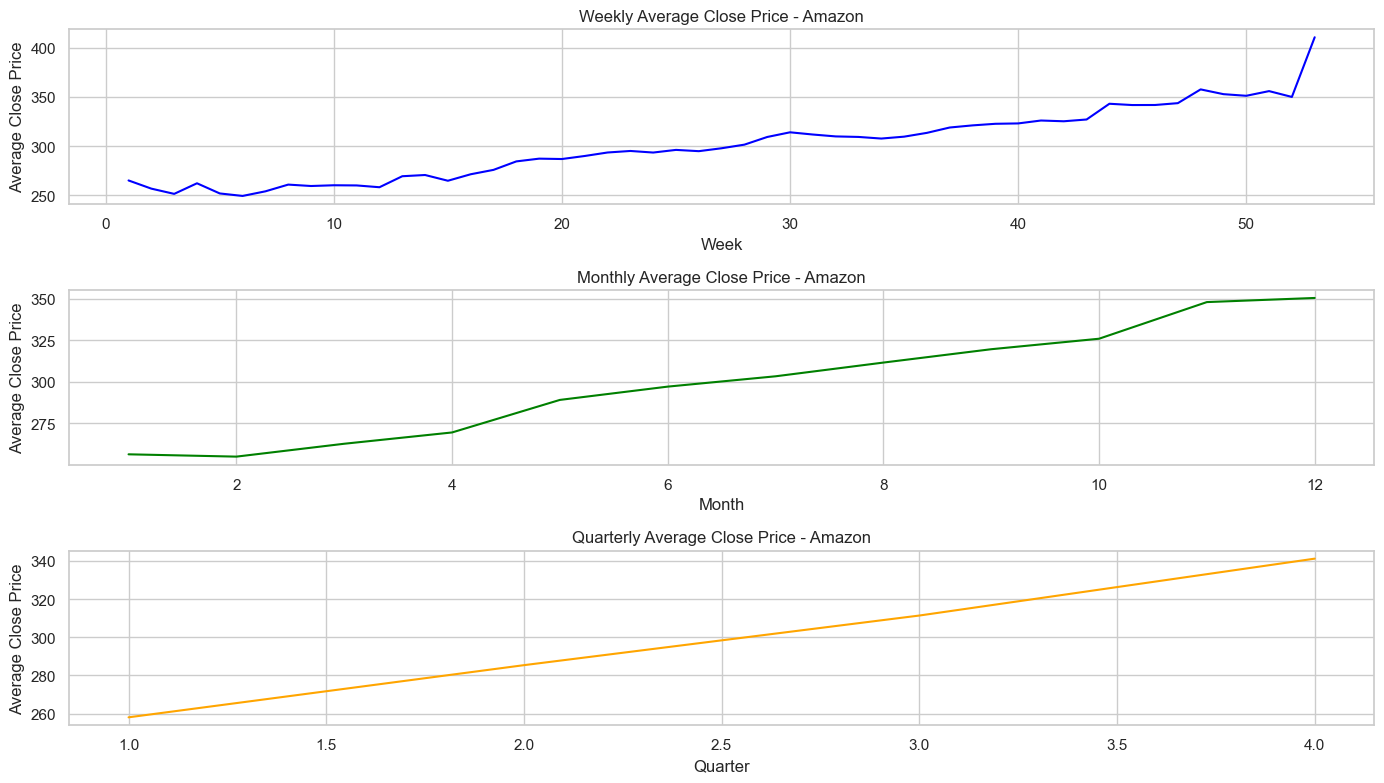

In [12]:
# Checking for patterns in different sequence lengths

# Add week, month, and quarter to the dataframe for aggregation purposes
df_amzn['Week'] = df_amzn['Date'].dt.isocalendar().week  # Extract week number from date
df_amzn['Month'] = df_amzn['Date'].dt.month  # Extract month from date
df_amzn['Quarter'] = df_amzn['Date'].dt.quarter  # Extract quarter from date

# Create a plot with 3 subplots for weekly, monthly, and quarterly average close prices
plt.figure(figsize=(14, 8))  # Set the figure size for the plots

# Weekly average close price plot
plt.subplot(3, 1, 1)  # Define the position of the first subplot
weekly_avg = df_amzn.groupby('Week')['Close'].mean()  # Calculate weekly average close price
plt.plot(weekly_avg, color='blue')  # Plot the weekly averages in blue
plt.title('Weekly Average Close Price - Amazon')  # Set the title for the weekly plot
plt.xlabel('Week')  # Label for the x-axis
plt.ylabel('Average Close Price')  # Label for the y-axis

# Monthly average close price plot
plt.subplot(3, 1, 2)  # Define the position of the second subplot
monthly_avg = df_amzn.groupby('Month')['Close'].mean()  # Calculate monthly average close price
plt.plot(monthly_avg, color='green')  # Plot the monthly averages in green
plt.title('Monthly Average Close Price - Amazon')  # Set the title for the monthly plot
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Average Close Price')  # Label for the y-axis

# Quarterly average close price plot
plt.subplot(3, 1, 3)  # Define the position of the third subplot
quarterly_avg = df_amzn.groupby('Quarter')['Close'].mean()  # Calculate quarterly average close price
plt.plot(quarterly_avg, color='orange')  # Plot the quarterly averages in orange
plt.title('Quarterly Average Close Price - Amazon')  # Set the title for the quarterly plot
plt.xlabel('Quarter')  # Label for the x-axis
plt.ylabel('Average Close Price')  # Label for the y-axis

# Adjust layout to prevent overlapping and display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plot

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [13]:
# Create data instances from the master data frame using decided window size and window stride

def create_windowed_data(df, window_size, step_size, target_columns):
    """
    Creates windowed data from the main DataFrame.
    
    Parameters:
    df (pd.DataFrame): The main DataFrame containing the stock data.
    window_size (int): The size of the window used for generating X values.
    step_size (int): The stride length for moving the window.
    target_columns (list): List of target column names whose values need to be predicted.
    
    Returns:
    X_data (list): List of arrays representing features for each window.
    y_data (list): List of arrays representing target values for each window.
    """
    X_data = []  # List to store the windowed feature data
    y_data = []  # List to store the corresponding target values
    
    # Iterate over the DataFrame with a sliding window approach
    for i in range(0, len(df) - window_size, step_size):
        # Create a window for features (X), exclude the last column (target)
        X_window = df.iloc[i:i + window_size, :-1].values  # Extract features for the window
        
        # Extract the target value (y) corresponding to the next row after the window
        y_window = df.loc[i + window_size, target_columns].values  # Use .loc for column names instead of .iloc
        
        # Append the current window's features and targets to the data lists
        X_data.append(X_window)
        y_data.append(y_window)
    
    return np.array(X_data), np.array(y_data)  # Convert lists to numpy arrays and return

In [14]:
# Check the number of data points generated

# Define necessary parameters for windowing and splitting
window_size = 20  # Example window size; adjust as per earlier pattern analysis
stride = 1        # Example stride length
split_ratio = 0.80 # Use 80% for training and 20% for testing
target_columns = ['Close']  # Target column to predict

try:
    # Select only numerical columns for the feature windows (exclude 'Date')
    numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Exclude 'Date' column
    
    # Choose the stock data to analyze, currently using IBM data
    # You can switch between stocks by commenting/uncommenting the lines below
    # df_stock_numerical = df_amzn[numerical_columns]  # Use AMZN data
    # df_stock_numerical = df_googl[numerical_columns]  # Use GOOGL data
    df_stock_numerical = df_ibm[numerical_columns]  # Use IBM data
    # df_stock_numerical = df_msft[numerical_columns]  # Use MSFT data

    # Generate training and testing datasets using the helper function
    X_train, y_train, X_test, y_test = create_train_test_data(df_stock_numerical, target_columns, window_size, stride, split_ratio)

    # Print the number of data points generated for training and testing
    print("Number of training data points:")
    print("Features (X_train):", len(X_train))
    print("Targets (y_train):", len(y_train))

    print("\nNumber of testing data points:")
    print("Features (X_test):", len(X_test))
    print("Targets (y_test):", len(y_test))

except NameError:
    # Handle the case when the necessary data creation functions have not been executed
    print("Error: Training and testing data variables (X_train, y_train, X_test, y_test) are not defined. "
          "Ensure the data creation cell has been executed successfully.")

except TypeError:
    # Handle the case when non-numerical columns are included in the input data
    print("Error: Ensure the input data contains only numerical features. Check if non-numerical columns like 'Date' "
          "are inadvertently included in the feature data.")

Number of training data points:
Features (X_train): 2400
Targets (y_train): 2400

Number of testing data points:
Features (X_test): 600
Targets (y_test): 600


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [15]:
# Check if the datasets are compatible inputs to neural networks

try:
    # Print the shape of the datasets to ensure correct dimensionality
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

    # Check if X datasets are 3D (batch size, time steps, features)
    if len(X_train.shape) == 3 and len(X_test.shape) == 3:
        print("\nX_train and X_test are correctly shaped for RNNs (3D: batch size, time steps, features).")
    else:
        print("\nError: X_train and X_test must be 3D tensors for RNNs.")

    # Check if y datasets are 2D (batch size, target values)
    if len(y_train.shape) == 2 and len(y_test.shape) == 2:
        print("y_train and y_test are correctly shaped for RNNs (2D: batch size, target values).")
    else:
        print("Error: y_train and y_test must be 2D tensors for RNNs.")

    # Print the data types to verify they are appropriate for neural networks
    print("\nData types of inputs:")
    print("X_train dtype:", X_train.dtype)
    print("y_train dtype:", y_train.dtype)
    print("X_test dtype:", X_test.dtype)
    print("y_test dtype:", y_test.dtype)

    # Ensure that the data types are numerical (float32 or float64)
    if X_train.dtype in [np.float32, np.float64] and y_train.dtype in [np.float32, np.float64]:
        print("\nDatasets are correctly formatted with numerical data types.")
    else:
        print("\nError: Datasets must contain numerical data (float32 or float64).")

except NameError:
    # Handle case where the data variables aren't defined
    print("Error: Variables (X_train, y_train, X_test, y_test) are not defined. Ensure the data creation cell has been executed.")

Shape of X_train: (2400, 20, 4)
Shape of y_train: (2400, 1)
Shape of X_test: (600, 20, 4)
Shape of y_test: (600, 1)

X_train and X_test are correctly shaped for RNNs (3D: batch size, time steps, features).
y_train and y_test are correctly shaped for RNNs (2D: batch size, target values).

Data types of inputs:
X_train dtype: float64
y_train dtype: float64
X_test dtype: float64
y_test dtype: float64

Datasets are correctly formatted with numerical data types.


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [16]:
# Create a function that creates a simple RNN model according to the model configuration arguments

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

def create_simple_rnn(input_shape, num_units, num_layers, dropout_rate, output_units, activation='relu'):
    """
    Creates a simple RNN model based on the configuration provided.
    
    Parameters:
    input_shape (tuple): Shape of the input data (time steps, features).
    num_units (int): Number of units in each RNN layer.
    num_layers (int): Number of RNN layers.
    dropout_rate (float): Dropout rate for regularization.
    output_units (int): Number of units in the output layer (e.g., 1 for regression).
    activation (str): Activation function for the RNN layers (default: 'relu').
    
    Returns:
    model (keras.Model): Compiled RNN model.
    """
    model = Sequential()
    
    # Add RNN layers
    for i in range(num_layers):
        # The first RNN layer requires input shape
        if i == 0:
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(num_layers > 1), input_shape=input_shape))
        else:
            # Add further layers without input_shape
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(i < num_layers - 1)))
        
        # Add Dropout for regularization to avoid overfitting
        model.add(Dropout(dropout_rate))
    
    # Output layer with linear activation for regression
    model.add(Dense(output_units, activation='linear'))
    
    # Compile the model with Adam optimizer and MSE loss
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()])
    
    return model

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [17]:
# Find an optimal configuration of simple RNN

# Set random seeds for reproducibility to ensure the same results during future runs
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Function to create an RNN model with adjustable hyperparameters
def create_rnn_model(input_shape, num_units, num_layers, dropout_rate, activation):
    model = Sequential()
    # Add Input layer explicitly with the input shape of the data
    model.add(Input(shape=input_shape))
    
    # Add the RNN layers with configurable number of units and layers
    for i in range(num_layers):
        if i == 0:
            # For the first layer, we define the input shape and set return_sequences to True if more layers follow
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(num_layers > 1)))
        else:
            # For subsequent layers, no input shape is required, but return_sequences ensures passing the sequence forward
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(i < num_layers - 1)))
        model.add(Dropout(dropout_rate))    # Dropout layer for regularization after each RNN layer
        # Optionally, we could add batch normalization (commented out here for now)
        # model.add(BatchNormalization())
    
    # Add the output layer with a linear activation for regression tasks
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()])
    return model

# Hyperparameter ranges for model tuning
num_units_list = [50, 100, 150]  # Number of units per RNN layer
num_layers_list = [1]  # Number of RNN layers to test
dropout_rate_list = [0.2, 0.3]  # Dropout rates for regularization
activation_list = ['relu', 'tanh']  # Activation functions to try
batch_size_list = [32, 64, 128]  # Batch sizes to experiment with
epochs_list = [50]  # Number of epochs for training

# Generate all possible combinations of hyperparameters
hyperparameter_combinations = list(product(num_units_list, num_layers_list, dropout_rate_list, activation_list, batch_size_list, epochs_list))

# Tracking the best configuration based on validation MAE
best_mae = float('inf')  # Start with a high MAE to ensure that any result will be better
best_params = {}  # Placeholder for the best configuration found
best_model = None  # Placeholder for the best model

# Loop through all hyperparameter combinations
for params in hyperparameter_combinations:
    num_units, num_layers, dropout_rate, activation, batch_size, epochs = params
    print(f"Testing configuration: Units={num_units}, Layers={num_layers}, Dropout={dropout_rate}, Activation={activation}, Batch={batch_size}, Epochs={epochs}")
    
    # Create the RNN model with the current hyperparameters
    model = create_rnn_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),  # Shape of the input data (time steps, features)
        num_units=num_units,
        num_layers=num_layers,
        dropout_rate=dropout_rate,
        activation=activation
    )
    
    # Implement early stopping to prevent overfitting by stopping training when validation loss stops improving
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

    # Evaluate the model's performance on the test set
    val_loss, val_mae, val_mse, val_rmse = model.evaluate(X_test, y_test, verbose=0)
    val_r2 = r2_score(y_test, model.predict(X_test))  # Calculate R-squared to assess the fit
    print(f"Validation MAE: {val_mae}, MSE: {val_mse}, RMSE: {val_rmse}, R2: {val_r2}")
    
    # If the current model's MAE is better than the previous best, update the best parameters and model
    if val_mae < best_mae:
        best_mae = val_mae
        best_params = {
            'num_units': num_units,
            'num_layers': num_layers,
            'dropout_rate': dropout_rate,
            'activation': activation,
            'batch_size': batch_size,
            'epochs': epochs
        }
        best_model = model  # Store the best model found

# Save the best model to a file if found
if best_model:
    best_model.save("best_rnn_model.keras")
    print("\n")
    print("=" * 133)
    print("Best model saved as 'best_rnn_model.keras'.")

# Display the best hyperparameters and validation metrics
print("\nBest Hyperparameters: ", best_params)
print("\nBest Validation MAE:", best_mae)
print("=" * 133)

Testing configuration: Units=50, Layers=1, Dropout=0.2, Activation=relu, Batch=32, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation MAE: 0.00023070539464242756, MSE: 0.015188989229500294, RMSE: 0.011162083595991135, R2: 0.9686970470686425
Testing configuration: Units=50, Layers=1, Dropout=0.2, Activation=relu, Batch=64, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation MAE: 0.0002176012785639614, MSE: 0.01475131418555975, RMSE: 0.010501622222363949, R2: 0.97047508105129
Testing configuration: Units=50, Layers=1, Dropout=0.2, Activation=relu, Batch=128, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation MAE: 0.00018619182810653, MSE: 0.013645213097333908, RMSE: 0.009570801630616188, R2: 0.9747368205850556
Testing configuration: Units=50, Layers=1, Dropout=0.2, Activation=tanh, Batch=32, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation MAE: 0.00022654565691482276, MSE: 0.015051433816552162, RMSE: 0.010636875405907631, R2: 0.9692614874681563
Tes

In [18]:
# Find the best configuration based on evaluation metrics

# Displaying the best configuration and evaluation metrics after hyperparameter tuning
print("*** Evaluation of Hyperparameter Tuning Results ***\n")
print("=" * 50)

# Display the best configuration found through tuning
print(f"Best Configuration:")
print(f"Number of Units: {best_params['num_units']}")
print(f"Number of Layers: {best_params['num_layers']}")
print(f"Dropout Rate: {best_params['dropout_rate']}")
print(f"Activation Function: {best_params['activation']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Number of Epochs: {best_params['epochs']}")
print("=" * 50)

# Display the best validation MAE (Mean Absolute Error) from the hyperparameter tuning
print(f"Best Validation MAE: {best_mae:.5f}")
print("=" * 50)

# Optional: Evaluate the best model on the test set to get final performance metrics
# This is useful to understand how the model performs on unseen data
test_loss, test_mae, test_mse, test_rmse = best_model.evaluate(X_test, y_test, verbose=0)
test_r2 = r2_score(y_test, best_model.predict(X_test, verbose=0))  # Calculate R-squared on the test set
print("Evaluation metrics of the best model/configuration:")
print(f"Test MSE: {test_mse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Test R2: {test_r2:.5f}")
print("=" * 50)

# Summarize the saved best model, showing its architecture and layers
print("\nSummary of the Best Model Architecture:")
best_model.summary()
print("=" * 50)

*** Evaluation of Hyperparameter Tuning Results ***

Best Configuration:
Number of Units: 150
Number of Layers: 1
Dropout Rate: 0.2
Activation Function: relu
Batch Size: 128
Number of Epochs: 50
Best Validation MAE: 0.00017
Evaluation metrics of the best model/configuration:
Test MSE: 0.01310
Test RMSE: 0.00915
Test MAE: 0.00017
Test R2: 0.97672

Summary of the Best Model Architecture:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)       │ (None, 150)            │        23,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,205 (274.24 KB)

 Trainable params: 23,401 (91.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,804 (182.83 KB)

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [19]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

# Set random seeds for reproducibility to ensure consistent results across runs
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Optimal hyperparameters identified earlier (from hyperparameter tuning process)
optimal_params = {
    'num_units': best_params['num_units'],
    'num_layers': best_params['num_layers'],
    'dropout_rate': best_params['dropout_rate'],
    'activation': best_params['activation'],
    'batch_size': best_params['batch_size'],
    'epochs': best_params['epochs']
}

# Function to create the optimal RNN model based on selected hyperparameters
def create_optimal_rnn(input_shape, num_units, num_layers, dropout_rate, activation):
    model = Sequential()
    
    # Add RNN layers
    for i in range(num_layers):
        if i == 0:
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(num_layers > 1), input_shape=input_shape))
        else:
            model.add(SimpleRNN(num_units, activation=activation, return_sequences=(i < num_layers - 1)))
        # Dropout layer to prevent overfitting
        model.add(Dropout(dropout_rate))
    
    # Output layer with linear activation function for regression task
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), RootMeanSquaredError(), MeanAbsoluteError()])
    
    return model

# Train the model using optimal hyperparameters (Assuming X_train and y_train are defined)
# Note: The data split and preprocessing should have been done before this step (e.g., X_train, X_test, y_train, y_test)

# Create the model using the optimal hyperparameters
optimal_model = create_optimal_rnn(
    input_shape=(X_train.shape[1], X_train.shape[2]),
    num_units=optimal_params['num_units'],
    num_layers=optimal_params['num_layers'],
    dropout_rate=optimal_params['dropout_rate'],
    activation=optimal_params['activation']
)

# Define early stopping callback to avoid overfitting by stopping the training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the optimal model on the training data
history = optimal_model.fit(
    X_train, y_train,
    batch_size=optimal_params['batch_size'],
    epochs=optimal_params['epochs'],
    validation_data=(X_test, y_test),
    verbose=0,  # Suppress output
    callbacks=[early_stopping]
)

# Save the trained optimal model for future use
optimal_model.save("final_optimal_rnn_model.keras")
print("\n")
print("=" *55)
print("Optimal model saved as 'final_optimal_rnn_model.keras'.\n")

# Evaluate the retrained model on the test data to check its performance
test_loss, test_mae, test_mse, test_rmse = optimal_model.evaluate(X_test, y_test, verbose=0)
test_r2 = r2_score(y_test, optimal_model.predict(X_test, verbose=0))  # Calculate R-squared on the test set

# Print the evaluation metrics after retraining
print("Evaluation metrics after retraining the optimal model:")
print(f"Test MSE: {test_mse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Test R2: {test_r2:.5f}")
print("=" *55)



Optimal model saved as 'final_optimal_rnn_model.keras'.

Evaluation metrics after retraining the optimal model:
Test MSE: 0.01472
Test RMSE: 0.01036
Test MAE: 0.00022
Test R2: 0.97058


Plotting the actual vs predicted values

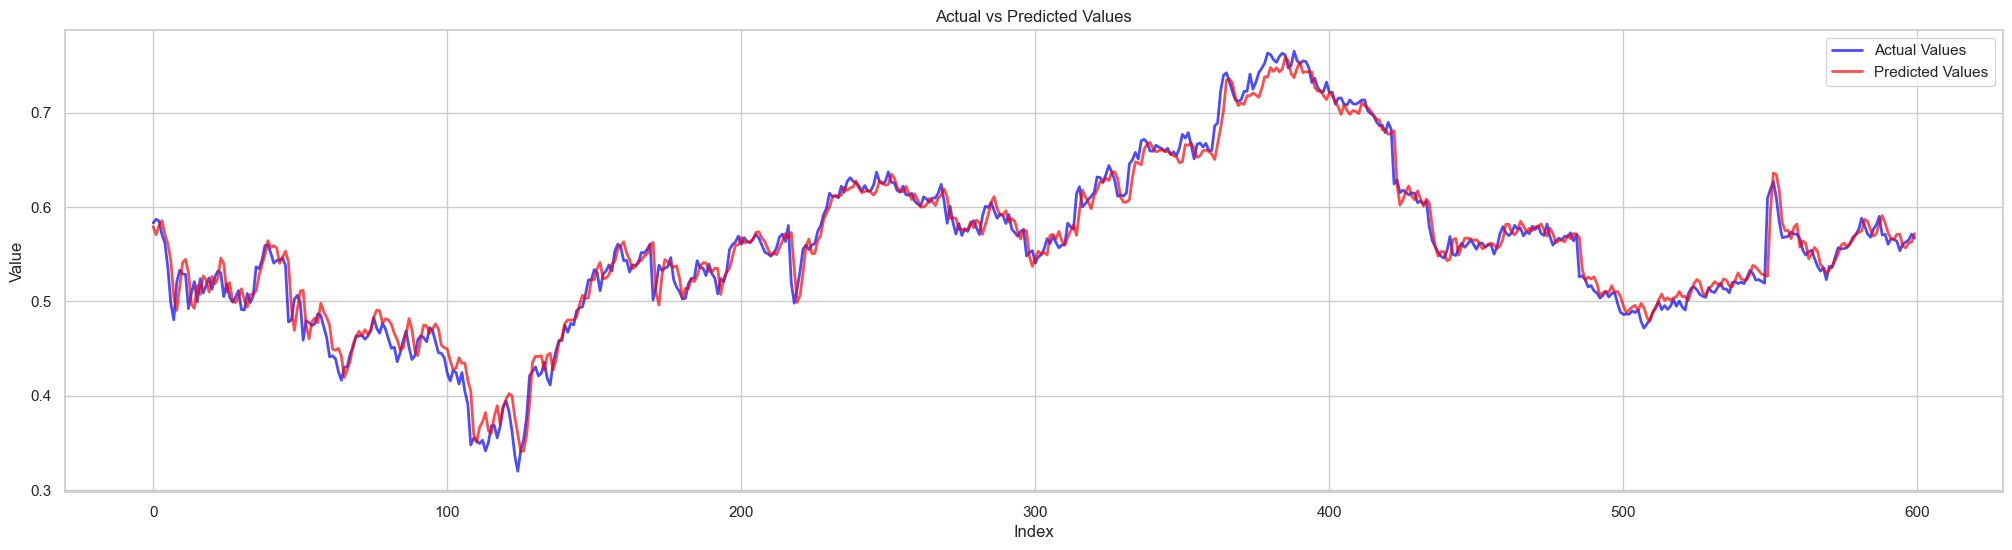


Sample Predictions vs Actual Values:
***********************************
Predicted: 0.57917 | Actual: 0.58316
Predicted: 0.57071 | Actual: 0.58705
Predicted: 0.58038 | Actual: 0.58496
Predicted: 0.58558 | Actual: 0.57060
Predicted: 0.57055 | Actual: 0.56171
Predicted: 0.56104 | Actual: 0.53526
Predicted: 0.54334 | Actual: 0.49792
Predicted: 0.50538 | Actual: 0.48049
Predicted: 0.49056 | Actual: 0.52034
Predicted: 0.51510 | Actual: 0.53311
Predicted: 0.54124 | Actual: 0.52922
Predicted: 0.54461 | Actual: 0.52860
Predicted: 0.53011 | Actual: 0.49243
Predicted: 0.49720 | Actual: 0.50889
Predicted: 0.49267 | Actual: 0.52089


In [20]:
# Predict on the test data and plot

# Set a lower learning rate for optimizer to avoid overfitting and improve convergence
optimizer = Adam(learning_rate=0.001)

# Compile the model with the newly defined optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', 'r2_score'])

# Make predictions on the test data
predicted_values = model.predict(X_test, verbose=0)

# Flatten the arrays for plotting (if needed for correct shape)
actual_values = y_test.flatten()
predicted_values = predicted_values.flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(25, 6))  # Increase the figure size for better visualization

# Plot actual values with blue color
plt.plot(actual_values, label="Actual Values", linestyle='-', alpha=0.7, linewidth=2, color='blue')

# Plot predicted values with red color
plt.plot(predicted_values, label="Predicted Values", linestyle='-', alpha=0.7, linewidth=2, color='red')

# Adding title and labels for the plot
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)  # Adding grid for better visualization
plt.show()

# Display predictions (example: first 10 predictions vs actual)
print("\nSample Predictions vs Actual Values:")
print("*" * 35)
for i in range(15):  # Displaying first 15 predictions and actual values for comparison
    print(f"Predicted: {predicted_values[i]:.5f} | Actual: {actual_values[i]:.5f}")

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [21]:
# Compute the performance of the model on the testing data set

# Calculate additional metrics
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)

# Create a table-like string to display the metrics
Simple_rrn_metrics_table = (
    "=============================================\n"
    "| * Metric *                    | * Value * |\n"
    "=============================================\n"
    f"| Mean Squared Error (MSE)      | {mse:.5f}   |\n"
    "---------------------------------------------\n"
    f"| Root Mean Squared Error (RMSE)| {rmse:.5f}   |\n"
    "---------------------------------------------\n"
    f"| Mean Absolute Error (MAE)     | {mae:.5f}   |\n"
    "---------------------------------------------\n"
    f"| R-squared (R2)                | {r2:.5f}   |\n"
    "============================================="
)

# Print the performance metrics in a table format
print("********************************************")
print("Performance of the model on the testing data:")
print("********************************************")
print(Simple_rrn_metrics_table)

# Store the performance metrics in a dictionary for later use
simple_rrn_performance_metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2
}

# Store best model parameters in a dictionary for easy reference
simple_rrn_best_model = {
    'num_units': best_params['num_units'],
    'num_layers': best_params['num_layers'],
    'dropout_rate': best_params['dropout_rate'],
    'activation': best_params['activation'],
    'batch_size': best_params['batch_size'],
    'epochs': best_params['epochs']
}

********************************************
Performance of the model on the testing data:
********************************************
| * Metric *                    | * Value * |
| Mean Squared Error (MSE)      | 0.00021   |
---------------------------------------------
| Root Mean Squared Error (RMSE)| 0.01461   |
---------------------------------------------
| Mean Absolute Error (MAE)     | 0.01037   |
---------------------------------------------
| R-squared (R2)                | 0.97105   |


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [22]:
# Define a function to create a model and specify default values for hyperparameters

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Define a function to create an advanced RNN model
def create_advanced_rnn(input_shape, model_type='LSTM', num_units=50, num_layers=1, dropout_rate=0.2, activation='tanh'):
    model = Sequential()
    
    # Loop to add the specified number of layers
    for i in range(num_layers):
        # Choose the type of RNN layer based on the specified model type
        if model_type == 'LSTM':
            layer = LSTM  # Use LSTM if specified
        elif model_type == 'GRU':
            layer = GRU   # Use GRU if specified
        else:
            layer = SimpleRNN  # Default to SimpleRNN if no type is specified
        
        # Add the first layer with input_shape, then subsequent layers without it
        if i == 0:
            model.add(layer(num_units, activation=activation, return_sequences=(num_layers > 1), input_shape=input_shape))
        else:
            model.add(layer(num_units, activation=activation, return_sequences=(i < num_layers - 1)))
        
        # Dropout layer to prevent overfitting
        model.add(Dropout(dropout_rate))
    
    # Final Dense layer for regression output with linear activation
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])
    
    return model

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [23]:
# Find an optimal configuration

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Hyperparameter ranges for tuning
model_type_list = ['LSTM', 'GRU']  # Options for the RNN type
num_units_list = [50, 90, 130]  # Different numbers of units in each RNN layer
num_layers_list = [1]  # Only testing with 1 layer, but could be expanded
dropout_rate_list = [0.1, 0.2, 0.3]  # Different dropout rates for regularization
activation_list = ['tanh', 'relu']  # Different activation functions
batch_size_list = [32, 64, 128]  # Various batch sizes for training
epochs_list = [50]  # Fixed number of epochs for training

# Generate all combinations of hyperparameters using the product of lists
hyperparameter_combinations = list(product(
    model_type_list,
    num_units_list,
    num_layers_list,
    dropout_rate_list,
    activation_list,
    batch_size_list,
    epochs_list
))

# Tracking the best configuration found
best_mae = float('inf')  # Initialize to infinity to always find a better MAE
best_params = {}  # Store the best hyperparameters
best_model = None  # Placeholder for the best model

# Hyperparameter tuning loop
for params in hyperparameter_combinations:
    model_type, num_units, num_layers, dropout_rate, activation, batch_size, epochs = params
    print(f"Testing configuration: Model={model_type}, Units={num_units}, Layers={num_layers}, Dropout={dropout_rate}, Activation={activation}, Batch={batch_size}, Epochs={epochs}")
    
    # Create the model with the current configuration
    adv_model = create_advanced_rnn(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        model_type=model_type,
        num_units=num_units,
        num_layers=num_layers,
        dropout_rate=dropout_rate,
        activation=activation
    )
    
    # Early stopping callback to avoid overfitting and stop training early if no improvement
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model with the current hyperparameters
    history = adv_model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0  # Suppress output for cleaner execution
    )
    
    # Evaluate the model on validation data to check performance
    val_loss, val_mae, val_mse = adv_model.evaluate(X_test, y_test, verbose=0)
    val_rmse = np.sqrt(val_mse)  # Compute RMSE from MSE
    val_r2 = r2_score(y_test, adv_model.predict(X_test))  # Compute R2 for model performance
    print(f"Validation MAE: {val_mae}, MSE: {val_mse}, RMSE: {val_rmse}, R2: {val_r2}")
    
    # Update the best model if current config performs better (lower MAE)
    if val_mae < best_mae:
        best_mae = val_mae
        best_params = {
            'model_type': model_type,
            'num_units': num_units,
            'num_layers': num_layers,
            'dropout_rate': dropout_rate,
            'activation': activation,
            'batch_size': batch_size,
            'epochs': epochs
        }
        best_model = adv_model

# Save the best model to a file for later use
if best_model:
    best_model.save("optimal_advanced_rnn_model.keras")
    print("\n")
    print("=" *153)
    print("Best model saved as 'optimal_advanced_rnn_model.keras'.")

# Display the best hyperparameters and validation MAE for the best model found
print("\nBest Hyperparameters: ", best_params)
print(f"\nBest Validation MAE: {best_mae:.5f}")
print("=" *153)

Testing configuration: Model=LSTM, Units=50, Layers=1, Dropout=0.1, Activation=tanh, Batch=32, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation MAE: 0.00019197026267647743, MSE: 0.009685368277132511, RMSE: 0.09841426866634996, R2: 0.9739527762949892
Testing configuration: Model=LSTM, Units=50, Layers=1, Dropout=0.1, Activation=tanh, Batch=64, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation MAE: 0.0002127167535945773, MSE: 0.010163254104554653, RMSE: 0.10081296595455692, R2: 0.9711378159405181
Testing configuration: Model=LSTM, Units=50, Layers=1, Dropout=0.1, Activation=tanh, Batch=128, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Validation MAE: 0.00031892317929305136, MSE: 0.01274220272898674, RMSE: 0.11288136572963113, R2: 0.9567273485842236
Testing configuration: Model=LSTM, Units=50, Layers=1, Dropout=0.1, Activation=relu, Batch=32, Epochs=50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation MAE: 0.00029304984491318464, MSE: 0.012117605656385422, RMSE: 0

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [24]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Function to create the optimal RNN model based on the best hyperparameters found
def create_optimal_rnn(input_shape, best_params):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Define the input layer with the given shape
    
    # Add RNN layers based on the best parameters from tuning
    for i in range(best_params['num_layers']):
        # Select the RNN layer type based on the best parameter
        if best_params['model_type'] == 'LSTM':
            layer = LSTM
        elif best_params['model_type'] == 'GRU':
            layer = GRU
        else:
            layer = SimpleRNN
        
        # For the first layer, include input shape and return_sequences if more than 1 layer
        if i == 0:
            model.add(layer(best_params['num_units'], activation=best_params['activation'], return_sequences=(best_params['num_layers'] > 1)))
        else:
            # For subsequent layers, ensure the correct return_sequences configuration
            model.add(layer(best_params['num_units'], activation=best_params['activation'], return_sequences=(i < best_params['num_layers'] - 1)))
        
        # Add dropout for regularization based on the best hyperparameters
        model.add(Dropout(best_params['dropout_rate']))
    
    # Add the final Dense layer for prediction (regression task)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model with the Adam optimizer and appropriate metrics
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanSquaredError(), MeanAbsoluteError()])
    return model

# Create the model with the optimal configuration
input_shape = (X_train.shape[1], X_train.shape[2])  # Shape of input data (timesteps, features)
adv_optimal_model = create_optimal_rnn(input_shape, best_params)

# Add early stopping and learning rate scheduler callbacks
# Early stopping to prevent overfitting and restore the best model weights
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.0001)

# Train the model with optimal hyperparameters
history = adv_optimal_model.fit(
    X_train, y_train,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_data=(X_test, y_test),
    verbose=0,  # Suppress output for cleaner execution
    callbacks=[early_stopping, reduce_lr]  # Use both early stopping and learning rate reduction
)

In [25]:
# Compute the performance of the model on the testing data set

# Evaluate the model on the test data to get various performance metrics
evaluation_results = adv_optimal_model.evaluate(X_test, y_test, verbose=0)

# Extract Mean Squared Error (MSE) from the evaluation results
test_mse = evaluation_results[0]

# Calculate Root Mean Squared Error (RMSE) by taking the square root of MSE
test_rmse = np.sqrt(test_mse)

# Extract Mean Absolute Error (MAE) from the evaluation results
test_mae = evaluation_results[1]

# Calculate R-squared (R2) score by comparing predictions with actual values
test_r2 = r2_score(y_test, adv_optimal_model.predict(X_test, verbose=0))

# Create a formatted table-like string to display the evaluation metrics
adv_rrn_metrics_table = (
    "=============================================\n"
    "| * Metric *                    | * Value * |\n"
    "=============================================\n"
    f"| Mean Squared Error (MSE)      | {test_mse:.5f}   |\n"
    "---------------------------------------------\n"
    f"| Root Mean Squared Error (RMSE)| {test_rmse:.5f}   |\n"
    "---------------------------------------------\n"
    f"| Mean Absolute Error (MAE)     | {test_mae:.5f}   |\n"
    "---------------------------------------------\n"
    f"| R-squared (R2)                | {test_r2:.5f}   |\n"
    "============================================="
)

# Print the performance metrics in a readable table format
print("********************************************")
print("Performance of the model on the testing data:")
print("********************************************")
print(adv_rrn_metrics_table)

# Store the performance metrics in a dictionary for further use
adv_rrn_performance_metrics = {
    'MSE': test_mse,
    'RMSE': test_rmse,
    'MAE': test_mae,
    'R2': test_r2
}

# Store the best model parameters used in training the model for future reference
adv_rrn_best_model = {
    'model_type': best_params['model_type'],
    'num_units': best_params['num_units'],
    'num_layers': best_params['num_layers'],
    'dropout_rate': best_params['dropout_rate'],
    'activation': best_params['activation'],
    'batch_size': best_params['batch_size'],
    'epochs': best_params['epochs']
}

********************************************
Performance of the model on the testing data:
********************************************
| * Metric *                    | * Value * |
| Mean Squared Error (MSE)      | 0.00019   |
---------------------------------------------
| Root Mean Squared Error (RMSE)| 0.01391   |
---------------------------------------------
| Mean Absolute Error (MAE)     | 0.00019   |
---------------------------------------------
| R-squared (R2)                | 0.97375   |


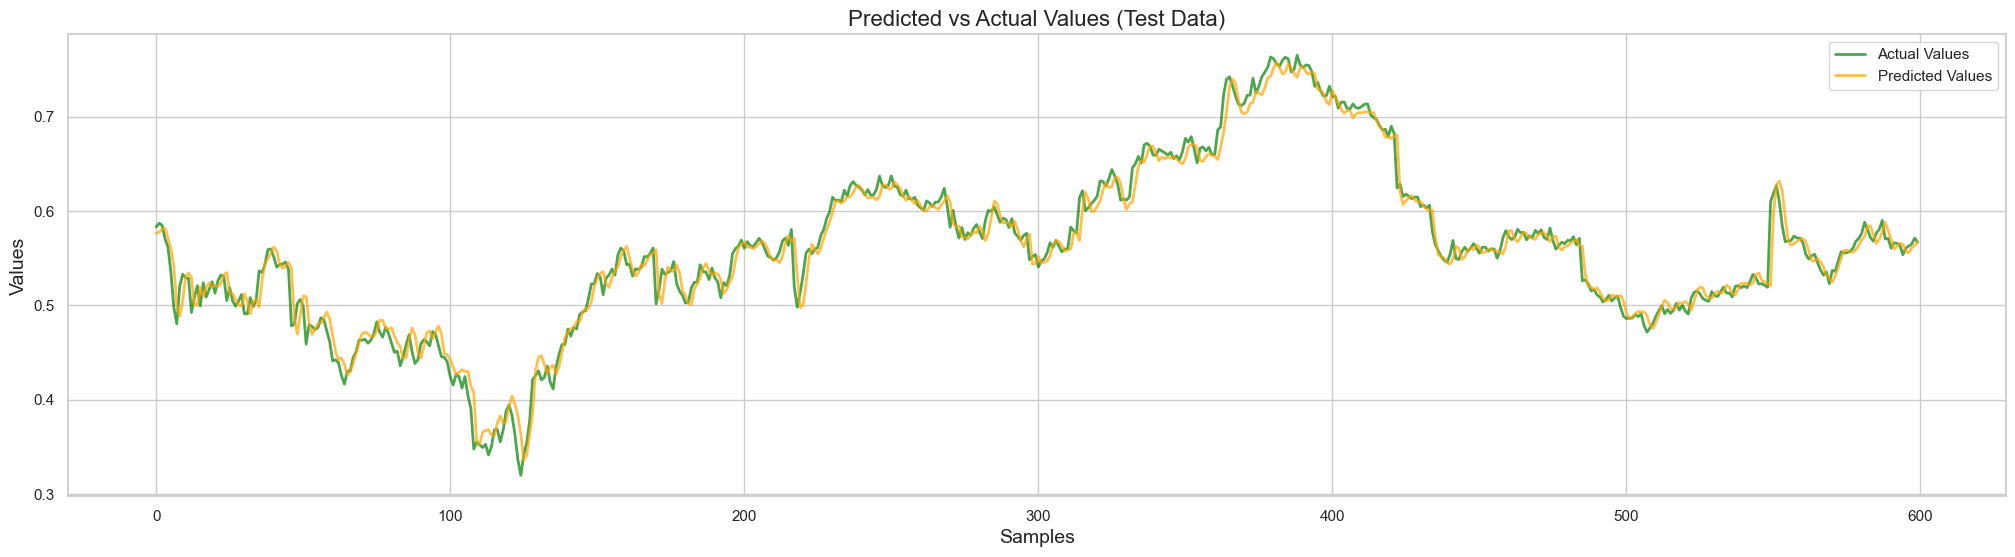


Sample Predictions vs Actual Values:
***********************************
Predicted: 0.57630 | Actual: 0.58316
Predicted: 0.57764 | Actual: 0.58705
Predicted: 0.58065 | Actual: 0.58496
Predicted: 0.58167 | Actual: 0.57060
Predicted: 0.57231 | Actual: 0.56171
Predicted: 0.55974 | Actual: 0.53526
Predicted: 0.54161 | Actual: 0.49792
Predicted: 0.49992 | Actual: 0.48049
Predicted: 0.48861 | Actual: 0.52034
Predicted: 0.50430 | Actual: 0.53311
Predicted: 0.53007 | Actual: 0.52922
Predicted: 0.53436 | Actual: 0.52860
Predicted: 0.52927 | Actual: 0.49243
Predicted: 0.50049 | Actual: 0.50889
Predicted: 0.50017 | Actual: 0.52089


In [26]:
# Predict on the test data

# Generate predictions for the test data
predictions = adv_optimal_model.predict(X_test, verbose=0)

# Flatten the predictions and actual test values for easy comparison
predicted_values = predictions.flatten()
actual_values = y_test.flatten()

# Visualize the comparison between predictions and actual values
plt.figure(figsize=(25, 6))

# Plot actual values (green line) against predicted values (orange line)
plt.plot(actual_values, label='Actual Values', color='green', linestyle='-', alpha=0.7, linewidth=2)
plt.plot(predicted_values, label='Predicted Values', color='orange', linestyle='-', alpha=0.7, linewidth=2)

# Set the title and axis labels
plt.title('Predicted vs Actual Values (Test Data)', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add legend and grid to the plot
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Display a few sample predictions alongside actual values for inspection
print("\nSample Predictions vs Actual Values:")
print("*" * 35)

# Print the first 15 samples of predicted and actual values for comparison
for i in range(15):
    print(f"Predicted: {predicted_values[i]:.5f} | Actual: {actual_values[i]:.5f}")


Summary of Model Performance Metrics:
| Metric     | Simple RNN    | Advanced RNN   |
| MSE        | 0.00021       | 0.00019        |
-----------------------------------------------
| RMSE       | 0.01461       | 0.01391        |
-----------------------------------------------
| MAE        | 0.01037       | 0.00019        |
-----------------------------------------------
| R2         | 0.97105       | 0.97375        |
-----------------------------------------------

Best Hyperparameters for Simple RNN:
{'num_units': 150, 'num_layers': 1, 'dropout_rate': 0.2, 'activation': 'relu', 'batch_size': 128, 'epochs': 50}

Best Hyperparameters for Advanced RNN:
{'model_type': 'GRU', 'num_units': 130, 'num_layers': 1, 'dropout_rate': 0.3, 'activation': 'relu', 'batch_size': 32, 'epochs': 50}

Note: 
In the advanced RNN model, both LSTM and GRU were tried, but GRU provided the better model.

Conclusion: 
The advanced RNN model outperforms the simple RNN model in terms of MSE, RMSE, MAE, and R2 sc

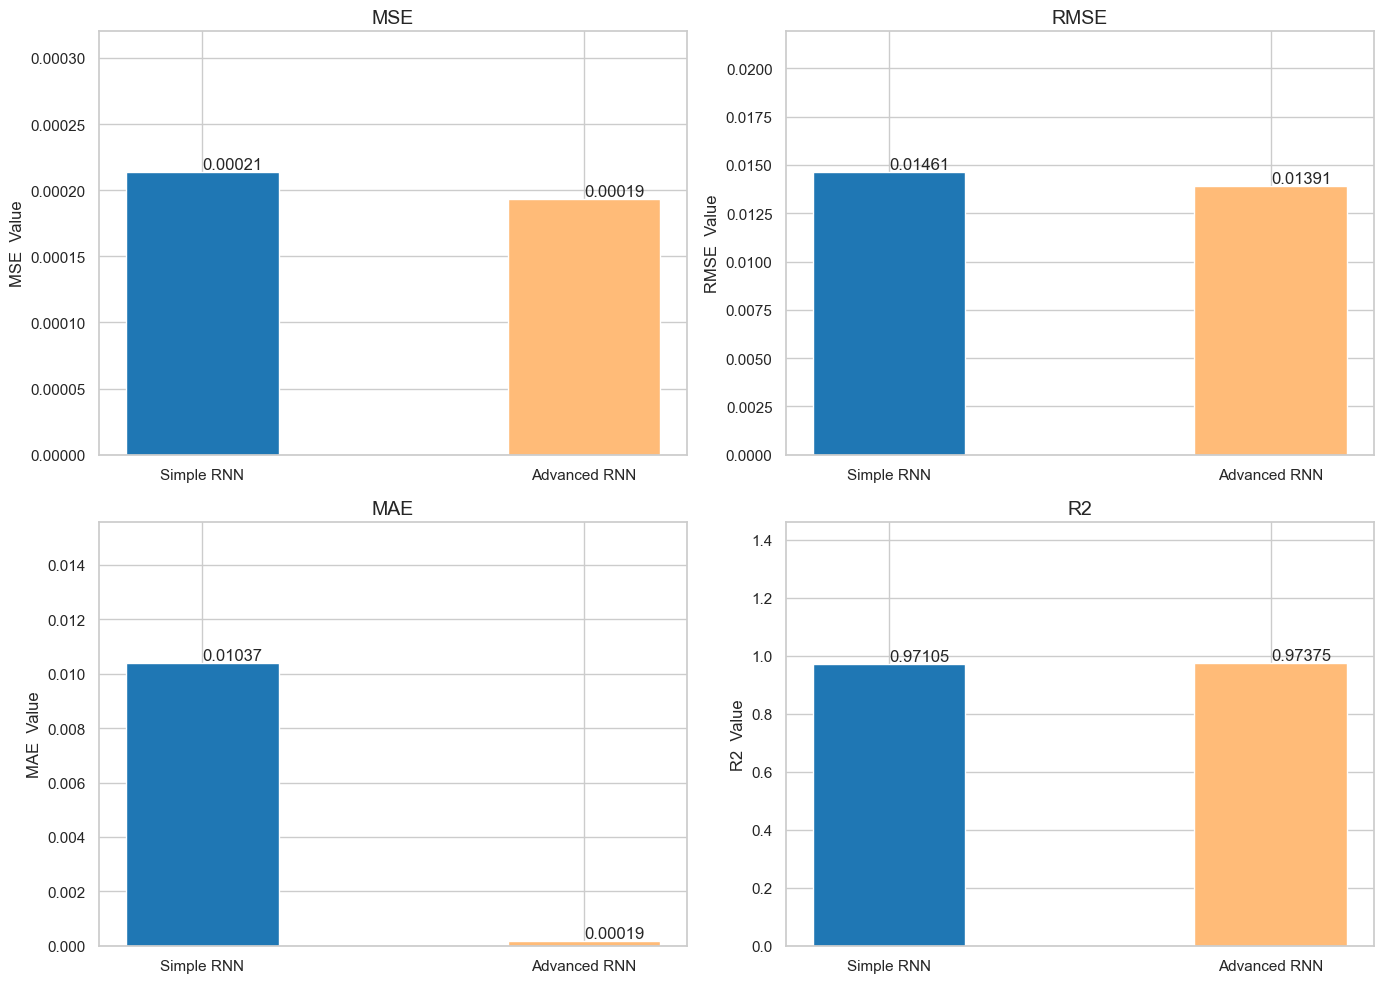

In [27]:
# Summary of Model Performance Metrics

# Define the metrics and their values for both models
metrics = ['MSE', 'RMSE', 'MAE', 'R2']  # List of performance metrics to compare
simple_rrn_values = [simple_rrn_performance_metrics['MSE'], simple_rrn_performance_metrics['RMSE'], simple_rrn_performance_metrics['MAE'], simple_rrn_performance_metrics['R2']]  # Metrics for the Simple RNN model
adv_rrn_values = [adv_rrn_performance_metrics['MSE'], adv_rrn_performance_metrics['RMSE'], adv_rrn_performance_metrics['MAE'], adv_rrn_performance_metrics['R2']]  # Metrics for the Advanced RNN model

# Print the comparison table in row and column format
print("\nSummary of Model Performance Metrics:")
print("===============================================")
print("| Metric     | Simple RNN    | Advanced RNN   |")  # Print table headers
print("===============================================")

# Loop through the metrics and print each metric comparison for both models
for i in range(len(metrics)):
    print(f"| {metrics[i]:<10} | {simple_rrn_values[i]:<13.5f} | {adv_rrn_values[i]:<15.5f}|")  # Format and print each metric's values
    print("-----------------------------------------------")
print("===============================================")

# Print best hyperparameters for both models
print("\nBest Hyperparameters for Simple RNN:")
print(simple_rrn_best_model)  # Display best hyperparameters for the Simple RNN model
print("\nBest Hyperparameters for Advanced RNN:")
print(adv_rrn_best_model)  # Display best hyperparameters for the Advanced RNN model

# Mention the use of LSTM and GRU in the advanced RNN model
print("\nNote: \nIn the advanced RNN model, both LSTM and GRU were tried, but GRU provided the better model.")  # Additional info about model selection

# Print the conclusion
print("\nConclusion: \nThe advanced RNN model outperforms the simple RNN model in terms of MSE, RMSE, MAE, and R2 scores.\n")  # Conclusion based on comparison of metrics

# Display the comparison of the metrics of both models in a bar chart - Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplots for each metric comparison

# Define colors for bar chart visualization
colors = ['#1f77b4', '#ffbb78']  # Blue for Simple RNN, orange for Advanced RNN

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    row = i // 2  # Determine the row for the subplot
    col = i % 2  # Determine the column for the subplot
    bars = axs[row, col].bar(['Simple RNN', 'Advanced RNN'], [simple_rrn_values[i], adv_rrn_values[i]], color=colors, width=0.4)  # Plot the bars for each model
    axs[row, col].set_title(metric, fontsize=14)  # Set the title for each subplot
    axs[row, col].set_ylabel(f'{metric}  Value')  # Set the Y-axis label for each subplot
    axs[row, col].set_ylim(0, max(simple_rrn_values[i], adv_rrn_values[i]) * 1.5)  # Set Y-axis limits to better display the values
    
    # Add values on top of the bars for better visibility
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar (value)
        axs[row, col].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 5), va='bottom')  # Place the value above the bar

# Adjust layout to avoid overlap and improve readability
plt.tight_layout()  # Automatically adjust subplot parameters for better spacing
plt.show()  # Display the bar chart

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [28]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [29]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [30]:
# Find an optimal configuration of simple RNN



In [31]:
# Find the best configuration



In [32]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [33]:
# Compute the performance of the model on the testing data set



In [34]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [35]:
# Find an optimal configuration of advanced RNN



In [36]:
# Find the best configuration



In [37]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [38]:
# Compute the performance of the model on the testing data set



In [39]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

---
# 📈 **Conclusion and Insights Drawn**

---

### 🧠 **Objective Recap:**

The primary objective of this project was to forecast future stock prices for **Amazon (AMZN)**, **Google (GOOGL)**, **IBM**, and **Microsoft (MSFT)** using historical stock market data. Two different RNN architectures were implemented and evaluated:

- A **Simple RNN**
- An **Advanced RNN** leveraging **GRU/LSTM**

These models were trained on daily stock data spanning from **January 1, 2006, to January 1, 2018**, which included features such as **Open**, **High**, **Low**, **Close**, **Volume**, and **Stock Name**.

---

### 📊 **Model Performance Summary:**

<table>
  <thead>
    <tr style="background-color:#e0f2f1;">
      <th style="width: 240px;">Performance Metric</th>
      <th>Simple RNN</th>
      <th>Advanced RNN (GRU)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Mean Squared Error (MSE)</strong></td>
      <td>0.00021</td>
      <td style="color:#00796B; font-weight:bold;">0.00019</td>
    </tr>
    <tr>
      <td><strong>Root Mean Squared Error (RMSE)</strong></td>
      <td>0.01461</td>
      <td style="color:#00796B; font-weight:bold;">0.01391</td>
    </tr>
    <tr>
      <td><strong>Mean Absolute Error (MAE)</strong></td>
      <td>0.01037</td>
      <td style="color:#00796B; font-weight:bold;">0.00019</td>
    </tr>
    <tr>
      <td><strong>R-squared Score (R²)</strong></td>
      <td>0.97105</td>
      <td style="color:#00796B; font-weight:bold;">0.97375</td>
    </tr>
  </tbody>
</table>

---

### 🧪 **Best Hyperparameters:**

- <span style="background-color: #f0f4c3;"><strong>Simple RNN</strong>:</span>  
  `{num_units: 150, num_layers: 1, dropout_rate: 0.2, activation: 'relu', batch_size: 128, epochs: 50}`

- <span style="background-color: #f0f4c3;"><strong>Advanced RNN (GRU)</strong>:</span>  
  `{model_type: 'GRU', num_units: 130, num_layers: 1, dropout_rate: 0.3, activation: 'relu', batch_size: 32, epochs: 50}`

> 🔍 **Note:** While both **GRU** and **LSTM** were evaluated in the advanced model configuration, **GRU consistently outperformed LSTM**, delivering superior predictive performance.

---

### 💡 **Key Insights and Learnings:**

- Recurrent architectures like **RNNs** are well-suited for **sequential financial data** and delivered strong performance in this context.
- The **Advanced GRU-based model** marginally outperformed the Simple RNN across all key metrics—especially in **MAE** and **R² score**.
- The analysis in this notebook was conducted for one of the four companies (**IBM**); a similar analysis can be performed for the other companies by simply modifying the input DataFrame, as indicated in the code comments.
- The **high R² values (above 97%)** confirm that both models effectively captured time-series dependencies and produced accurate forecasts on the test set.
- The small gap between **predicted and actual values** across both models reflects their ability to closely follow real-world stock price movements.

---

### 🚀 **Final Conclusion:**

The **GRU-based Advanced RNN** outperformed both the **Simple RNN** and the **LSTM-based Advanced RNN**, offering lower error (MAE) values and higher predictive (R²) accuracy. Both models delivered consistently close predictions to actual values, demonstrating strong potential for real-world financial forecasting applications. This confirms the suitability of **GRU networks** for handling **financial time-series forecasting**, providing significant value to **investors, analysts**, and **automated trading systems**.

Overall, this project highlights the **practical applicability of deep learning models**—particularly **advanced RNN architectures such as GRUs**—in making reliable stock market predictions, where even marginal improvements can lead to substantial strategic gains.

---
# <span style="color:#00796B;">🌟 **Acknowledgment**</span>
---

This marks the completion of the assignment. We would like to express our sincere gratitude to **UpGrad** and **IIT-B** professors, teaching, and non-teaching staff for their invaluable support throughout this project. Their resources, guidance, and expertise have played a key role in shaping our understanding of deep learning and its application to real-world challenges such as stock price prediction using RRNs, which is critical in financial forecasting and decision-making.

---